<a href="https://colab.research.google.com/github/abdullahamruf/biological_Seuence_analysis/blob/main/RNA_analysis_T2D(XGB).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Feature Extraction**

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/RNA analysis/T2D-Level-GSE81608_GeneLevel_Raw_data.csv', header=None)

<ipython-input-41-6bca2514baa4>:2: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,

In [42]:
# Transpose
df = df.T

In [43]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,28080,28081,28082,28083,28084,28085,28086,28087,28088,28089
0,NaN,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,...,ENSG00000283677,ENSG00000283678,ENSG00000283681,ENSG00000283682,ENSG00000283685,ENSG00000283688,ENSG00000283690,ENSG00000283694,ENSG00000283697,ENSG00000283699
1,gene_symbol,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,...,MIR3913-2,MIR6830,TCF20,MIR548AH,MIR522,MIR6715B,MIR3116-2,MIR3202-2,HSFX3,MIR4481
2,GSM2157899,4.0685,0,0,6.098,0,0,0,8.6118,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,GSM2157900,0.8755,0,6.2501,10.3465,0,0,0,16.2721,85.7705,...,0.0,0.0,0.8168,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,GSM2157901,1.2943,0,62.6107,12.2002,1.8483,0,7.4244,4.1191,1.6251,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
df.columns = df.iloc[0]
df = df.iloc[1:].reset_index(drop=True)

In [45]:
df.columns = df.iloc[0]
df = df.iloc[1:].reset_index(drop=True)
# set the second row as the column headers

In [46]:
df.head()

,gene_symbol,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,...,MIR3913-2,MIR6830,TCF20,MIR548AH,MIR522,MIR6715B,MIR3116-2,MIR3202-2,HSFX3,MIR4481
0,GSM2157899,4.0685,0,0,6.098,0,0,0,8.6118,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,GSM2157900,0.8755,0,6.2501,10.3465,0,0,0,16.2721,85.7705,...,0.0,0.0,0.8168,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,GSM2157901,1.2943,0,62.6107,12.2002,1.8483,0,7.4244,4.1191,1.6251,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,GSM2157902,0,0,0,22.1665,0,0,0,0,0.7967,...,0.0,0.0,10.8795,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,GSM2157903,11.4406,0,18.2915,6.2444,0,0,0,3.4575,0,...,0.0,0.0,5.5639,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
df1 = df.copy()
df1.head()

,gene_symbol,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,...,MIR3913-2,MIR6830,TCF20,MIR548AH,MIR522,MIR6715B,MIR3116-2,MIR3202-2,HSFX3,MIR4481
0,GSM2157899,4.0685,0,0,6.098,0,0,0,8.6118,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,GSM2157900,0.8755,0,6.2501,10.3465,0,0,0,16.2721,85.7705,...,0.0,0.0,0.8168,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,GSM2157901,1.2943,0,62.6107,12.2002,1.8483,0,7.4244,4.1191,1.6251,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,GSM2157902,0,0,0,22.1665,0,0,0,0,0.7967,...,0.0,0.0,10.8795,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,GSM2157903,11.4406,0,18.2915,6.2444,0,0,0,3.4575,0,...,0.0,0.0,5.5639,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
df1.rename(columns = {'sample_names':'Sample_Names'}, inplace = True)
df1.head()

,gene_symbol,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,...,MIR3913-2,MIR6830,TCF20,MIR548AH,MIR522,MIR6715B,MIR3116-2,MIR3202-2,HSFX3,MIR4481
0,GSM2157899,4.0685,0,0,6.098,0,0,0,8.6118,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,GSM2157900,0.8755,0,6.2501,10.3465,0,0,0,16.2721,85.7705,...,0.0,0.0,0.8168,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,GSM2157901,1.2943,0,62.6107,12.2002,1.8483,0,7.4244,4.1191,1.6251,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,GSM2157902,0,0,0,22.1665,0,0,0,0,0.7967,...,0.0,0.0,10.8795,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,GSM2157903,11.4406,0,18.2915,6.2444,0,0,0,3.4575,0,...,0.0,0.0,5.5639,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
df1.to_csv('/content/drive/MyDrive/RNA analysis/T2D-Level-GSE81608_GeneLevel_final_Raw_data.csv', index=False)

In [50]:
f = pd.read_csv('/content/drive/MyDrive/RNA analysis/T2D-Level-GSE81608_GeneLevel_final_Raw_data.csv')
f.head()

,gene_symbol,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,...,MIR3913-2,MIR6830,TCF20.7,MIR548AH,MIR522,MIR6715B,MIR3116-2,MIR3202-2,HSFX3,MIR4481
0,GSM2157899,4.0685,0.0,0.0000,6.0980,0.0000,0.0,0.0000,8.6118,0.0000,...,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,GSM2157900,0.8755,0.0,6.2501,10.3465,0.0000,0.0,0.0000,16.2721,85.7705,...,0.0,0.0,0.8168,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,GSM2157901,1.2943,0.0,62.6107,12.2002,1.8483,0.0,7.4244,4.1191,1.6251,...,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,GSM2157902,0.0000,0.0,0.0000,22.1665,0.0000,0.0,0.0000,0.0000,0.7967,...,0.0,0.0,10.8795,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,GSM2157903,11.4406,0.0,18.2915,6.2444,0.0000,0.0,0.0000,3.4575,0.0000,...,0.0,0.0,5.5639,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **Levelling Dataset with 0 and 1**

In [51]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/RNA analysis/T2D-Level-GSE81608_GeneLevel_final_Raw_data.csv')
df.head()

,gene_symbol,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,...,MIR3913-2,MIR6830,TCF20.7,MIR548AH,MIR522,MIR6715B,MIR3116-2,MIR3202-2,HSFX3,MIR4481
0,GSM2157899,4.0685,0.0,0.0000,6.0980,0.0000,0.0,0.0000,8.6118,0.0000,...,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,GSM2157900,0.8755,0.0,6.2501,10.3465,0.0000,0.0,0.0000,16.2721,85.7705,...,0.0,0.0,0.8168,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,GSM2157901,1.2943,0.0,62.6107,12.2002,1.8483,0.0,7.4244,4.1191,1.6251,...,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,GSM2157902,0.0000,0.0,0.0000,22.1665,0.0000,0.0,0.0000,0.0000,0.7967,...,0.0,0.0,10.8795,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,GSM2157903,11.4406,0.0,18.2915,6.2444,0.0000,0.0,0.0000,3.4575,0.0000,...,0.0,0.0,5.5639,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
df.rename( columns={'gene_symbol':'Sample_Names'}, inplace=True )
df.head()

,Sample_Names,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,...,MIR3913-2,MIR6830,TCF20.7,MIR548AH,MIR522,MIR6715B,MIR3116-2,MIR3202-2,HSFX3,MIR4481
0,GSM2157899,4.0685,0.0,0.0000,6.0980,0.0000,0.0,0.0000,8.6118,0.0000,...,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,GSM2157900,0.8755,0.0,6.2501,10.3465,0.0000,0.0,0.0000,16.2721,85.7705,...,0.0,0.0,0.8168,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,GSM2157901,1.2943,0.0,62.6107,12.2002,1.8483,0.0,7.4244,4.1191,1.6251,...,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,GSM2157902,0.0000,0.0,0.0000,22.1665,0.0000,0.0,0.0000,0.0000,0.7967,...,0.0,0.0,10.8795,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,GSM2157903,11.4406,0.0,18.2915,6.2444,0.0000,0.0,0.0000,3.4575,0.0000,...,0.0,0.0,5.5639,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **Import Meta Data**

In [53]:
import pandas as pd
md = pd.read_csv('/content/drive/MyDrive/RNA analysis/GSE81608_filtered_metadata.csv')

In [54]:
md.rename( columns={'Unnamed: 0':'Sample_Names'}, inplace=True )
md.head()

,Sample_Names,characteristics,condition,age,ethnicity,gender,cell subtype
0,GSM2157899,Pancreatic islet cell sample 1,non-diabetic,23,AA,M,beta
1,GSM2157900,Pancreatic islet cell sample 2,non-diabetic,23,AA,M,beta
2,GSM2157901,Pancreatic islet cell sample 3,non-diabetic,23,AA,M,beta
3,GSM2157902,Pancreatic islet cell sample 4,non-diabetic,23,AA,M,beta
4,GSM2157903,Pancreatic islet cell sample 5,non-diabetic,23,AA,M,beta


In [55]:
md['condition'].unique()

array(['non-diabetic', 'T2D'], dtype=object)

In [56]:
type(md['condition'][1])

str

In [57]:
print(df.shape)
print(md.shape)

(1600, 28090)
(1600, 7)


In [58]:
###Merge RawData and Metadata
dfm = pd.merge(df, md[["Sample_Names", "condition"]], on="Sample_Names", how="left")
dfm.head()

,Sample_Names,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,...,MIR6830,TCF20.7,MIR548AH,MIR522,MIR6715B,MIR3116-2,MIR3202-2,HSFX3,MIR4481,condition
0,GSM2157899,4.0685,0.0,0.0000,6.0980,0.0000,0.0,0.0000,8.6118,0.0000,...,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,non-diabetic
1,GSM2157900,0.8755,0.0,6.2501,10.3465,0.0000,0.0,0.0000,16.2721,85.7705,...,0.0,0.8168,0.0,0.0,0.0,0.0,0.0,0.0,0.0,non-diabetic
2,GSM2157901,1.2943,0.0,62.6107,12.2002,1.8483,0.0,7.4244,4.1191,1.6251,...,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,non-diabetic
3,GSM2157902,0.0000,0.0,0.0000,22.1665,0.0000,0.0,0.0000,0.0000,0.7967,...,0.0,10.8795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,non-diabetic
4,GSM2157903,11.4406,0.0,18.2915,6.2444,0.0000,0.0,0.0000,3.4575,0.0000,...,0.0,5.5639,0.0,0.0,0.0,0.0,0.0,0.0,0.0,non-diabetic


In [59]:
dfm.to_csv('/content/drive/MyDrive/RNA analysis/T2D_meta_GSE81608_filtered_metadata.csv', index = False)
dfm.head()

,Sample_Names,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,...,MIR6830,TCF20.7,MIR548AH,MIR522,MIR6715B,MIR3116-2,MIR3202-2,HSFX3,MIR4481,condition
0,GSM2157899,4.0685,0.0,0.0000,6.0980,0.0000,0.0,0.0000,8.6118,0.0000,...,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,non-diabetic
1,GSM2157900,0.8755,0.0,6.2501,10.3465,0.0000,0.0,0.0000,16.2721,85.7705,...,0.0,0.8168,0.0,0.0,0.0,0.0,0.0,0.0,0.0,non-diabetic
2,GSM2157901,1.2943,0.0,62.6107,12.2002,1.8483,0.0,7.4244,4.1191,1.6251,...,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,non-diabetic
3,GSM2157902,0.0000,0.0,0.0000,22.1665,0.0000,0.0,0.0000,0.0000,0.7967,...,0.0,10.8795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,non-diabetic
4,GSM2157903,11.4406,0.0,18.2915,6.2444,0.0000,0.0,0.0000,3.4575,0.0000,...,0.0,5.5639,0.0,0.0,0.0,0.0,0.0,0.0,0.0,non-diabetic


In [60]:
dfm_2 = dfm.copy()
dfm_2.loc[dfm_2['condition'] == 'T2D', 'condition'] = 1
dfm_2.loc[dfm_2['condition'] == 'non-diabetic', 'condition'] = 0
dfm_2.head()

,Sample_Names,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,...,MIR6830,TCF20.7,MIR548AH,MIR522,MIR6715B,MIR3116-2,MIR3202-2,HSFX3,MIR4481,condition
0,GSM2157899,4.0685,0.0,0.0000,6.0980,0.0000,0.0,0.0000,8.6118,0.0000,...,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,GSM2157900,0.8755,0.0,6.2501,10.3465,0.0000,0.0,0.0000,16.2721,85.7705,...,0.0,0.8168,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,GSM2157901,1.2943,0.0,62.6107,12.2002,1.8483,0.0,7.4244,4.1191,1.6251,...,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,GSM2157902,0.0000,0.0,0.0000,22.1665,0.0000,0.0,0.0000,0.0000,0.7967,...,0.0,10.8795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,GSM2157903,11.4406,0.0,18.2915,6.2444,0.0000,0.0,0.0000,3.4575,0.0000,...,0.0,5.5639,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [61]:
dfm_2.to_csv('/content/drive/MyDrive/RNA analysis/Final_T2D_meta_GSE81608_filtered_metadata.csv', index = False)
dfm_2['condition'].value_counts()

1    949
0    651
Name: condition, dtype: int64

# **Machine Learning**

In [62]:
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import OrdinalEncoder, normalize
from sklearn.model_selection import GroupKFold, StratifiedKFold
from sklearn.metrics import confusion_matrix
import torch
from torch.utils.data import DataLoader
import math
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.metrics import confusion_matrix
#from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,fbeta_score, matthews_corrcoef
from sklearn.metrics import accuracy_score
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [63]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/RNA analysis/Final_T2D_meta_GSE81608_filtered_metadata.csv')

df.head()

,Sample_Names,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,...,MIR6830,TCF20.7,MIR548AH,MIR522,MIR6715B,MIR3116-2,MIR3202-2,HSFX3,MIR4481,condition
0,GSM2157899,4.0685,0.0,0.0000,6.0980,0.0000,0.0,0.0000,8.6118,0.0000,...,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,GSM2157900,0.8755,0.0,6.2501,10.3465,0.0000,0.0,0.0000,16.2721,85.7705,...,0.0,0.8168,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,GSM2157901,1.2943,0.0,62.6107,12.2002,1.8483,0.0,7.4244,4.1191,1.6251,...,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,GSM2157902,0.0000,0.0,0.0000,22.1665,0.0000,0.0,0.0000,0.0000,0.7967,...,0.0,10.8795,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,GSM2157903,11.4406,0.0,18.2915,6.2444,0.0000,0.0,0.0000,3.4575,0.0000,...,0.0,5.5639,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


Make Ready Data

In [64]:
#df['churn'] = df['churn'].apply(np.int64)
y_true = df['condition']
df.drop(['Sample_Names','condition'], axis=1, inplace=True)
y_true = list(map(int, y_true.values))
X = df
y = y_true

Gradient Boosting

In [65]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, log_loss
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd

# Assuming X is your feature matrix and y is the binary target vector
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create the XGBoost model with the provided parameters
xgb_model = xgb.XGBClassifier(
    learning_rate=0.5,
    max_depth=8,
    subsample=1,
    colsample_bytree=1,
    min_child_weight=1,
    gamma=0,
    reg_lambda=1,
    objective='binary:logistic'
)

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# Predict on the test data
predictions = xgb_model.predict(X_test)
predicted_probabilities = xgb_model.predict_proba(X_test)[:, 1]

# Compute metrics
accuracy = accuracy_score(y_test, predictions)
logloss = log_loss(y_test, predicted_probabilities)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
roc_auc = roc_auc_score(y_test, predicted_probabilities)
f1 = f1_score(y_test, predictions)
cm = confusion_matrix(y_test, predictions)
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
tpr = recall  # True Positive Rate is the same as recall
fpr = cm[0, 1] / (cm[0, 1] + cm[0, 0])  # False Positive Rate

# Print the metrics
print(f"Accuracy: {accuracy}")
print(f"Log Loss: {logloss}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Roc Auc: {roc_auc}")
print(f"Specificity: {specificity}")
print(f"F1-Score: {f1}")
print(f"TPR: {tpr}")
print(f"FPR: {fpr}")
print(classification_report(y_test, predictions))

# Extracting feature importances
feature_importances = xgb_model.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Display top 100 important features
top_100_features = importance_df.sort_values(by='Importance', ascending=False).head(100)
print(top_100_features)

Accuracy: 0.965625
Log Loss: 0.08482567875198285
Precision: 0.9792746113989638
Recall: 0.9642857142857143
Roc Auc: 0.9944453587886768
Specificity: 0.967741935483871
F1-Score: 0.9717223650385605
TPR: 0.9642857142857143
FPR: 0.03225806451612903
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       124
           1       0.98      0.96      0.97       196

    accuracy                           0.97       320
   macro avg       0.96      0.97      0.96       320
weighted avg       0.97      0.97      0.97       320

        Feature  Importance
9415      MZT2B    0.061367
18309     HLA-A    0.039899
15060    DAZAP2    0.033224
10293     CTBP1    0.026224
312      MBTPS2    0.024180
...         ...         ...
8024      SGSM2    0.002102
20294   HLA-A.4    0.002093
18326    CFAP44    0.002044
17218  TMEM184B    0.001970
14055    NAP1L5    0.001905

[100 rows x 2 columns]


In [66]:
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import matthews_corrcoef

kappa = cohen_kappa_score(y_test, predictions)
mcc = matthews_corrcoef(y_test, predictions)

In [67]:
print(f"Cohen's Kappa: {kappa}")
print(f"Matthews Correlation Coefficient: {mcc}")

Cohen's Kappa: 0.9279043093560544
Matthews Correlation Coefficient: 0.9280837310275375


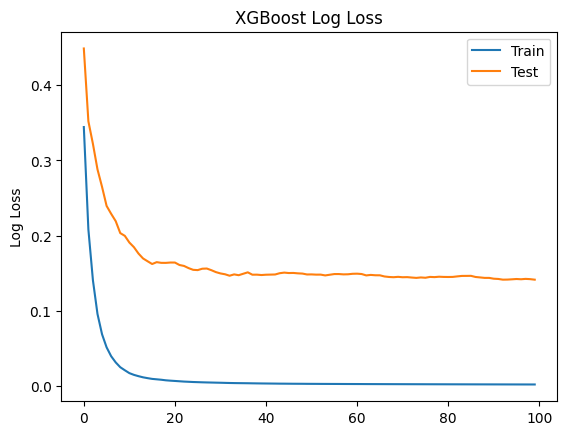

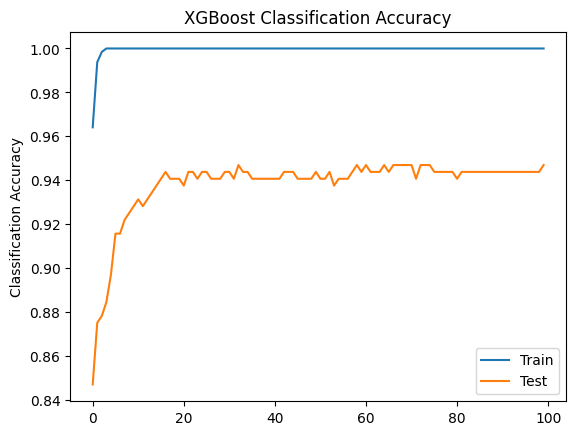

In [68]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss, precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix, classification_report
import xgboost as xgb
import pandas as pd

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create the XGBoost model with the provided parameters
xgb_model = xgb.XGBClassifier(
    learning_rate=0.5,
    max_depth=8,
    subsample=1,
    colsample_bytree=1,
    min_child_weight=1,
    gamma=0,
    reg_lambda=1,
    objective='binary:logistic',
    use_label_encoder=False,
    eval_metric=['logloss', 'error']  # For a binary classification problem, 'logloss' is typically used.
)

# Fit the model to the training data with eval set to track log loss for each iteration
eval_set = [(X_train, y_train), (X_test, y_test)]
xgb_model.fit(X_train, y_train, eval_set=eval_set, verbose=False)

# Retrieve performance metrics from xgb_model's evals_result
results = xgb_model.evals_result()

# Plotting the training and testing accuracy
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)

# Plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()

# Plot classification error
fig, ax = plt.subplots()
ax.plot(x_axis, [1 - x for x in results['validation_0']['error']], label='Train')
ax.plot(x_axis, [1 - x for x in results['validation_1']['error']], label='Test')
ax.legend()
plt.ylabel('Classification Accuracy')
plt.title('XGBoost Classification Accuracy')
plt.show()

In [69]:
from sklearn.metrics import confusion_matrix

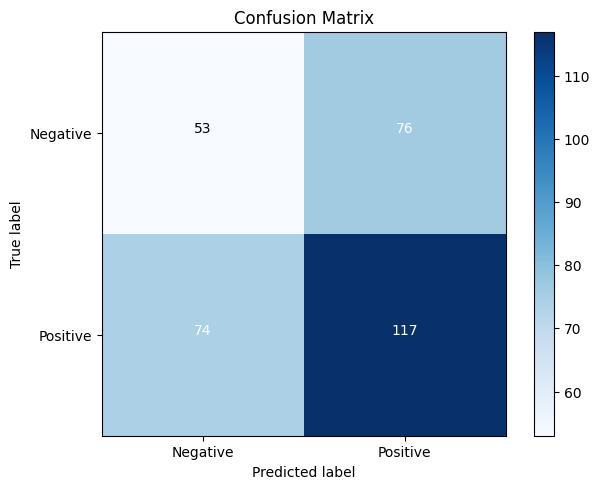

In [70]:
import matplotlib.pyplot as plt
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plot confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=['Negative', 'Positive'], normalize=False, title='Confusion Matrix')
plt.show()


In [71]:
pip install lime

In [72]:
import lime


In [73]:
pip install shap

In [74]:
import shap

In [75]:
shap_values_tree = shap.TreeExplainer(xgb_model).shap_values(X_test[0:20])

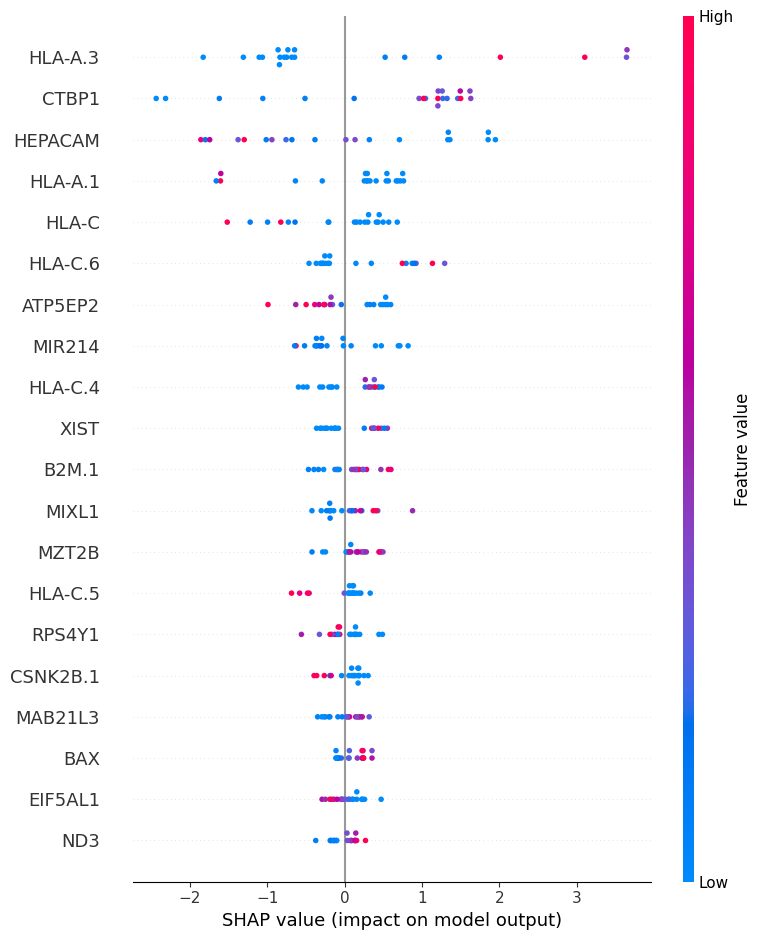

In [76]:
shap.summary_plot(shap_values_tree, X_test[0:20])

In [77]:
shap_values_tree[0].shape

(28089,)

In [80]:
xgb_model.predict(X_test.values[10].reshape(1, -1))

array([0])

In [81]:
y_test[10]

0

In [90]:
features = list(df.columns)